## Titanic Data Pre-Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
# sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [2]:
df = pd.read_csv('titanic.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ваші висновки:

тут ми можемо побачити що важливий атрибут віку пасажирів має пропуски, також багато пропущених значень має `Cabin`, і дуже незначну кількість - `Embarked`

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



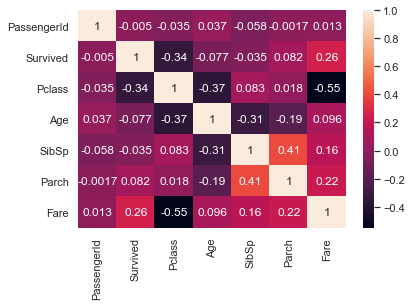

In [5]:
coef = df.corr(method='pearson')
sns.heatmap(coef, annot=True)
plt.show()

Ваші висновки:

маємо логічну кореляцію між класом та вартісnю проїзду, також закономірність між кількістю подружжя на борту та кількістю батьків і дітей

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [6]:
def fill_na_median(df: pd.DataFrame, col: str, groups: list):
    df[col] = df[col].fillna(df.groupby(groups)[col].transform('mean'))
    return df

fill_na_median(df, 'Age', ['Sex']).isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.groupby(['Sex'])['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

Ваші висновки:

оскільки значення віку пасижирів у чоловіків і жінок в середньому різне, то заповнювати пропущені значення треба середнім значенням залежно від статі

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





In [8]:
age_bin = pd.cut(df.Age, 5, labels = range(5))
df["Age_bin"] = age_bin
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


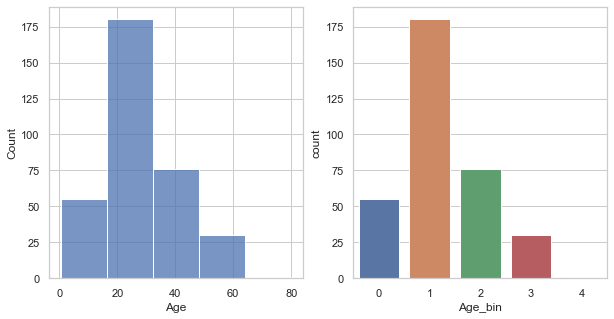

In [9]:
f, ax = plt.subplots(1,2,figsize=(10,5))

sns.histplot(x=df[df['Survived']==1]['Age'], ax=ax[0], bins=5)
sns.countplot(x=df[df['Survived']==1]['Age_bin'], ax=ax[1])
plt.show()

In [10]:
df[df['Survived']==1]['Age_bin'].value_counts()

1    180
2     76
0     55
3     30
4      1
Name: Age_bin, dtype: int64

Ваші висновки:

з графіків можемо побачити що найбільше вижило людей з категорії 1 (16-32 років), та тільки один виживший з четвертої вікової категорії

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

In [11]:
df['Fare_bin'] = pd.qcut(df.Fare, 4, labels=range(4))

df.groupby(['Fare_bin'])['Survived'].apply(lambda x: (x==1).sum())

Fare_bin
0     44
1     68
2    101
3    129
Name: Survived, dtype: int64

Ваші висновки:

на теплокарті ми бачили кореляцію між `Fare` та `Survived`, тому гіпотеза про те що в залежності від `Fare`, змінюється кількість виживших, підтверджується

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [12]:
df['Family_size'] = df['Parch'] + df['SibSp']
df['Alone'] = [1 if i==0 else 0 for i in df['Family_size']]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,Fare_bin,Family_size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,3,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,3,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,1,0,1


Ваші висновки:

зробивши окремі атрибути для кількості членів сім'ї, ми узагальнили дані

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [13]:
df = df.drop(columns=['Age', 'Fare', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'PassengerId', 'Name'])
df.head()

,Survived,Pclass,Sex,Embarked,Age_bin,Fare_bin,Family_size,Alone
0,0,3,male,S,1,0,1,0
1,1,1,female,C,2,3,1,0
2,1,3,female,S,1,1,0,1
3,1,1,female,S,2,3,1,0
4,0,3,male,S,2,1,0,1


Ваші висновки:

атрибути віку `Age` та вартості `Fare` нам не потрбіен, бо ми перетворили їх в категоріальні. `SibSp` та `Parch` - не потрбіні, бо з них стоврили `Family_size` і `Alone`. Колонка квитка `Ticket`виглядає незмістовною, `Cabin` - має багато пропусків. `PassengerId` та `Name` - не впливають ні на що.

***Завдання 9:*** Перетворіть змінні ```Sex``` та ```Embarked``` в числові значення


In [14]:
df.isna().sum()

Survived       0
Pclass         0
Sex            0
Embarked       2
Age_bin        0
Fare_bin       0
Family_size    0
Alone          0
dtype: int64

In [15]:
df['Embarked'] = df['Embarked'].fillna('S')
df.isna().sum()

Survived       0
Pclass         0
Sex            0
Embarked       0
Age_bin        0
Fare_bin       0
Family_size    0
Alone          0
dtype: int64

In [16]:
df['Sex'] = df['Sex'].factorize()[0]
df['Embarked'] = df['Embarked'].factorize()[0]

df.head()

,Survived,Pclass,Sex,Embarked,Age_bin,Fare_bin,Family_size,Alone
0,0,3,0,0,1,0,1,0
1,1,1,1,1,2,3,1,0
2,1,3,1,0,1,1,0,1
3,1,1,1,0,2,3,1,0
4,0,3,0,0,2,1,0,1


Ваші висновки:

датасет готовий для моделювання, всі колонки складаються з числових даних

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



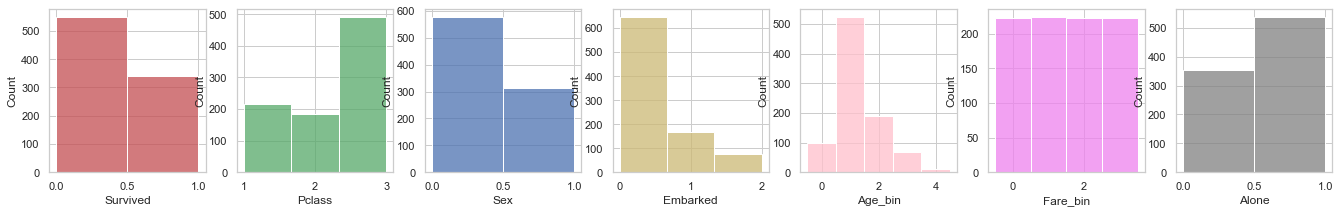

In [17]:
f, ax = plt.subplots(1,7,figsize=(23,3))

sns.histplot(x=df['Survived'], ax=ax[0], color='r', bins=2)
sns.histplot(x=df['Pclass'], ax=ax[1], color='g', bins=3)
sns.histplot(x=df['Sex'], ax=ax[2], color='b', bins=2)
sns.histplot(x=df['Embarked'], ax=ax[3], color='y', bins=3)
sns.histplot(x=df['Age_bin'], ax=ax[4], color='pink')
sns.histplot(x=df['Fare_bin'], ax=ax[5], color='violet')
sns.histplot(x=df['Alone'], ax=ax[6],color='gray', bins=2)
plt.show()

Ваші висновки:

спостерігаємо за розподілом категоріальних змінних, можемо оцінити які дані знаходяться в датасеті

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

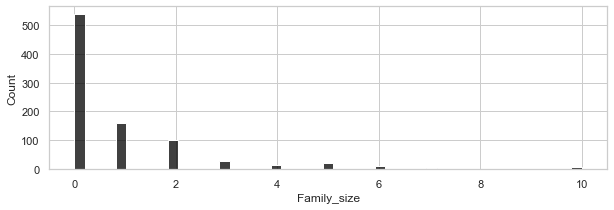

In [18]:
f, ax = plt.subplots(figsize=(10,3))

sns.histplot(x=df['Family_size'], color='black')
plt.show()

Ваші висновки:

у `Family_size` помітно викиди

## Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

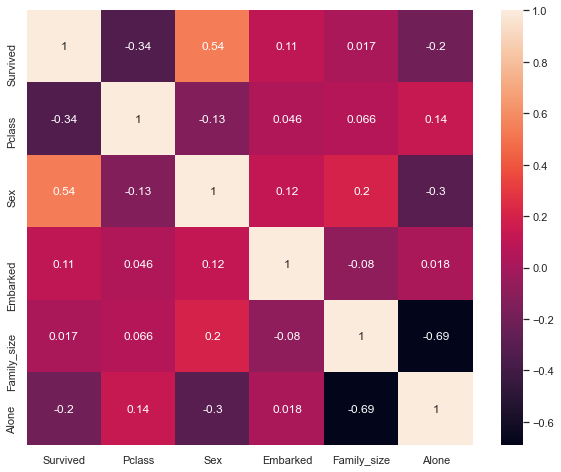

In [19]:
f, ax = plt.subplots(1,1,figsize=(10,8))
coef = df.corr(method='pearson')
sns.heatmap(coef, xticklabels=coef.columns, yticklabels=coef.columns, annot=True)
plt.show()

Ваші висновки:

порівняно з першим графіком кореляції, тепер можемо спостерігати залежність виживання від статі та класом